In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
from scipy import stats
%matplotlib inline

In [3]:
train = pd.read_csv('~/Desktop/train.csv')

In [4]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
list(train)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [6]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [7]:
train.groupby('YrSold').nunique()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
YrSold,,,,,,,,,,,,,,,,,,,,,
2006,314,14,5,74,265,1,2,4,4,1,...,5,3,4,2,6,12,1,7,6,231
2007,329,15,5,74,297,2,2,4,4,1,...,2,1,4,2,10,12,1,5,6,247
2008,304,15,5,68,266,2,2,4,4,1,...,3,1,4,1,9,12,1,7,5,214
2009,338,15,5,73,285,1,2,4,4,2,...,1,0,4,2,10,12,1,6,5,239
2010,175,13,4,59,160,2,2,3,4,1,...,1,0,3,2,11,7,1,5,5,151


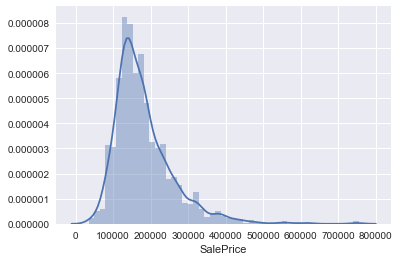

In [8]:
sns.distplot(train['SalePrice'])

In [9]:
print("kurtosis: %f" % train['SalePrice'].kurt())
print('skewness: %f' % train['SalePrice'].skew())

kurtosis: 6.536282
skewness: 1.882876


I think this means we need to log-transform the data. data's not folowing normal distribution- it's peaked and has a positive skew. 

In [10]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

we're looking at 1460 observations, none of them below or equal to zero, looks like we might be dealing with some outliers on the upper end of things(duh because skewness above. and graph.)

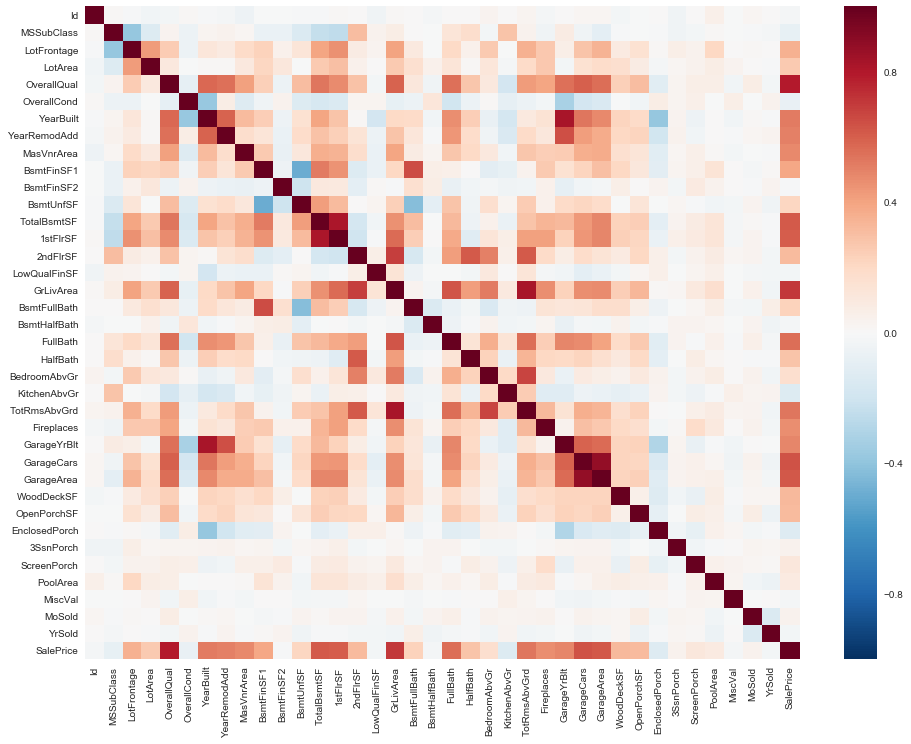

In [11]:
overall_corr = train.corr()
ax = plt.subplots(figsize = (16,12))
sns.heatmap(overall_corr)

So sales price is correlated strongest with Overall Qual, YearBuilt, GrLivingArea, TotalBsmntSF GrLivingArea, GarageCars, GarageArea,etc. going back and looking at this again, this only features numerical categories, will try and figure out how to do this for the categorical ones as well.

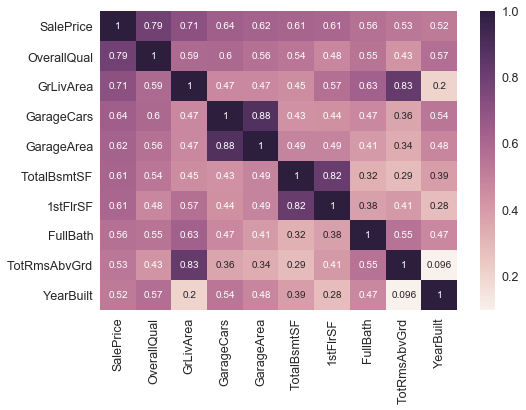

In [110]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = overall_corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [13]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(5)

,Total,Percent
LotFrontage,259,17.739726
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
SalePrice,0,0.000000


In [12]:
train.loc[:, "Alley"] = train.loc[:, "Alley"].fillna("None")
train.loc[:, "BsmtQual"] = train.loc[:, "BsmtQual"].fillna("None")
train.loc[:, "BsmtCond"] = train.loc[:, "BsmtCond"].fillna("None")
train.loc[:, "BsmtExposure"] = train.loc[:, "BsmtExposure"].fillna("None")
train.loc[:, "BsmtFinType1"] = train.loc[:, "BsmtFinType1"].fillna("None")
train.loc[:, "BsmtFinType2"] = train.loc[:, "BsmtFinType2"].fillna("None")
train.loc[:, "FireplaceQu"] = train.loc[:, "FireplaceQu"].fillna("None")
train.loc[:, "GarageType"] = train.loc[:, "GarageType"].fillna("None")
train.loc[:, "GarageYrBlt"] = train.loc[:, "GarageYrBlt"].fillna("None")
train.loc[:, "GarageFinish"] = train.loc[:, "GarageFinish"].fillna("None")
train.loc[:, "GarageQual"] = train.loc[:, "GarageQual"].fillna("None")
train.loc[:, "GarageCond"] = train.loc[:, "GarageCond"].fillna("None")
train.loc[:, "PoolQC"] = train.loc[:, "PoolQC"].fillna("None")
train.loc[:, "Fence"] = train.loc[:, "Fence"].fillna("None")
train.loc[:, "MiscFeature"] = train.loc[:, "MiscFeature"].fillna("None")


we might want to drop anything with more than 20% missing data, not sure if should keep lot frontage and impute or not- it's still got a ton of missing data, and it doesn't seem to have a huge correlation with sales price

In [14]:
categorical_train = pd.get_dummies(train)

In [15]:
categorical_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,0,0,0,1,0,0,0,0,1,0
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,0,1,0,0,0,0,1,0
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,0,0,0,1,0,0,0,0,1,0
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,0,0,0,1,1,0,0,0,0,0
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,0,0,1,0,0,0,0,1,0


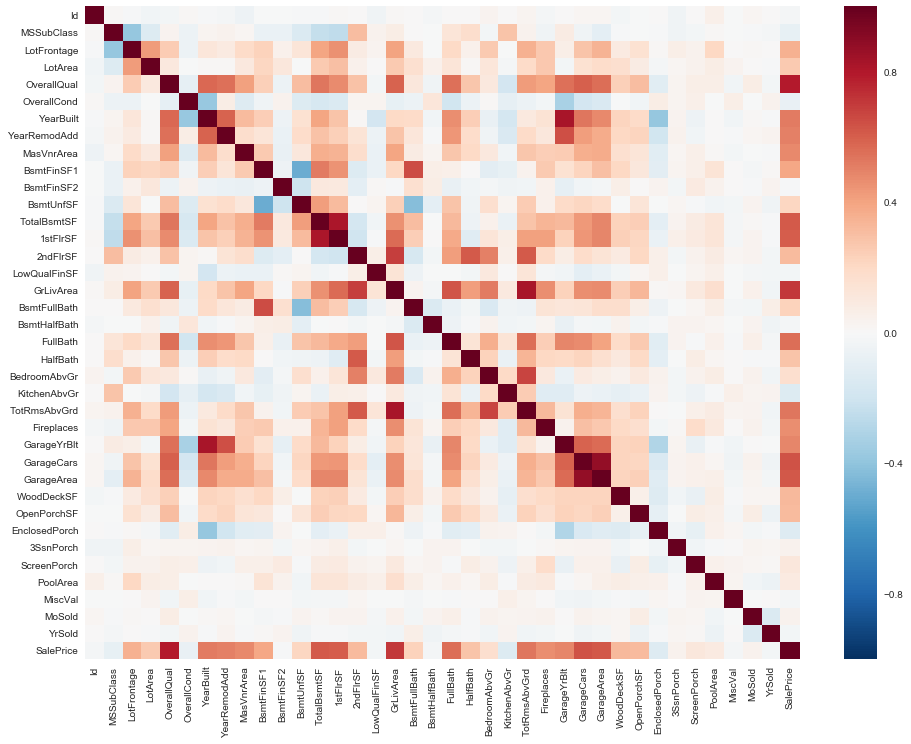

In [16]:
corr_w_categories = categorical_train.corr()
ax = plt.subplots(figsize = (16,12))
sns.heatmap(overall_corr)

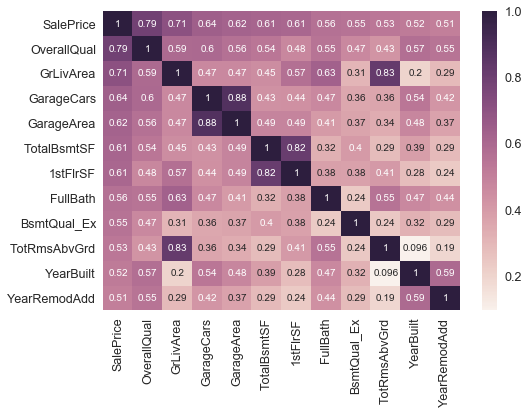

In [19]:
k = 12 #number of variables for heatmap
cols = corr_w_categories.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(categorical_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

so basement quality@EX has a strong enough correlation to push year built off the top 10. Interesting. not sure i'm doing this right though, will have to sit down with you guys or a TA to check it. It has a high correlation with GRLivingArea though, might have to drop it anyway. Garage Area/Garage Cars also high correlation as do 1stFlrST and TotalBsmntSF.

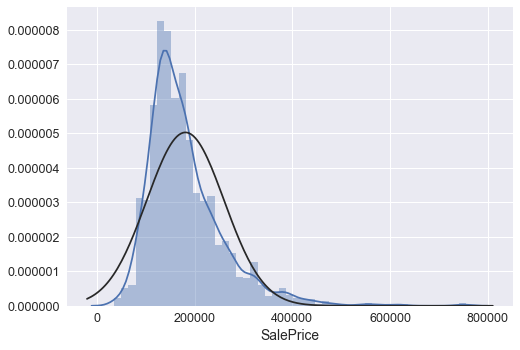

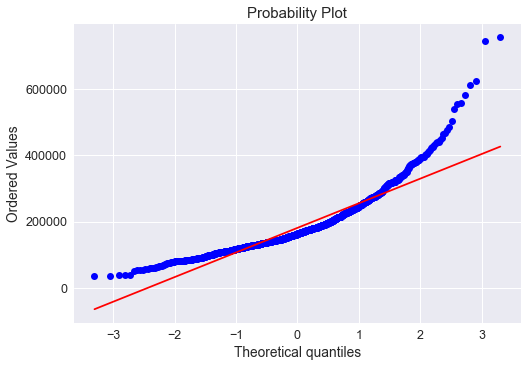

In [61]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

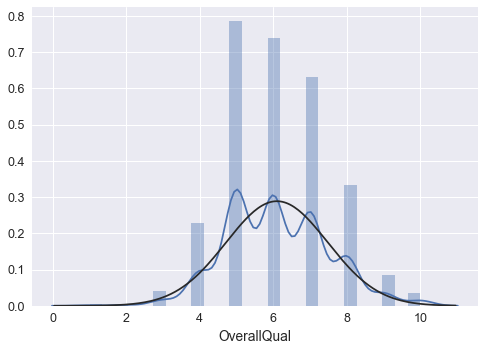

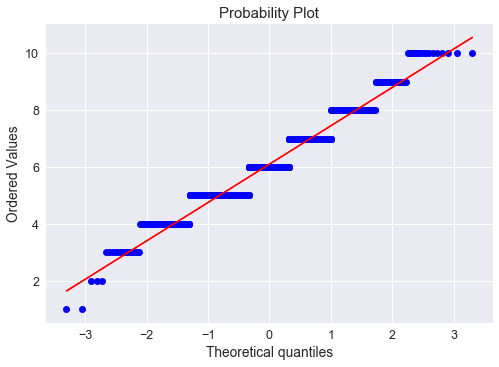

In [62]:
sns.distplot(train['OverallQual'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['OverallQual'], plot=plt)

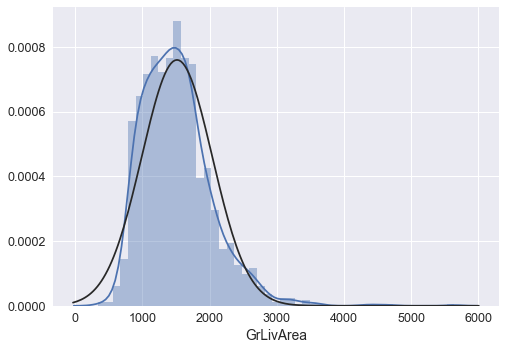

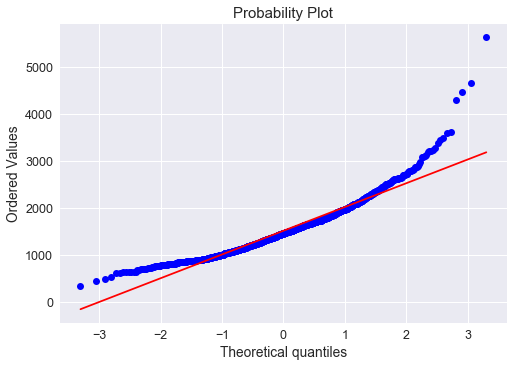

In [63]:
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

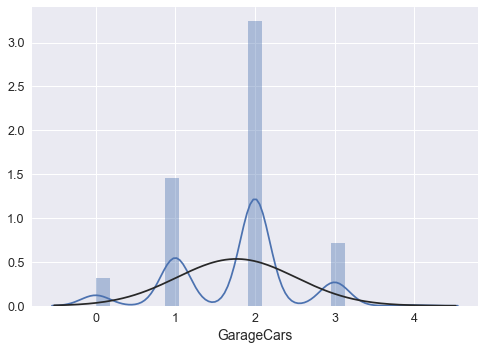

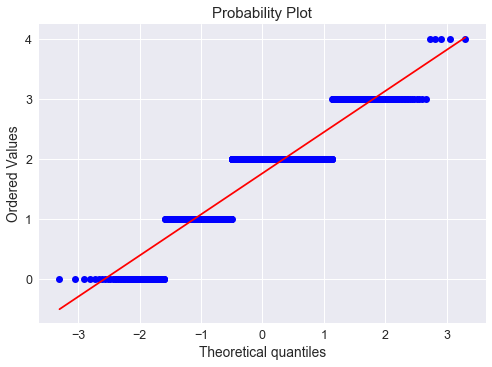

In [64]:
sns.distplot(train['GarageCars'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GarageCars'], plot=plt)

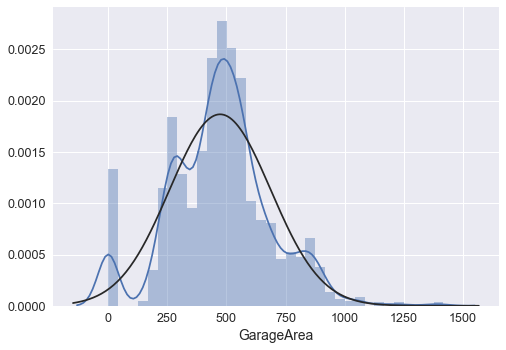

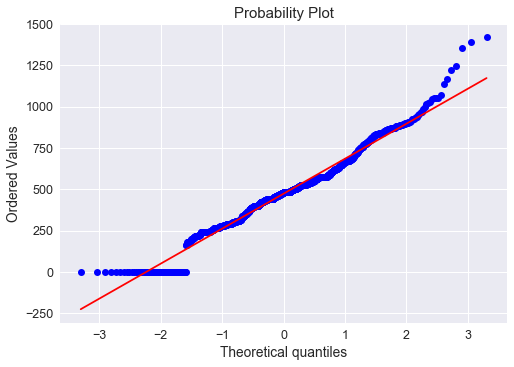

In [65]:
sns.distplot(train['GarageArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GarageArea'], plot=plt)

substantial number of buildings without a basement- need to separate out into categorical- has basement, doesn't have basement, then use that? outside of that the skew and kurtosis look like they'd be ok.

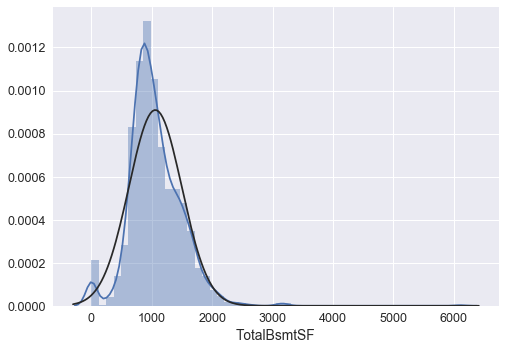

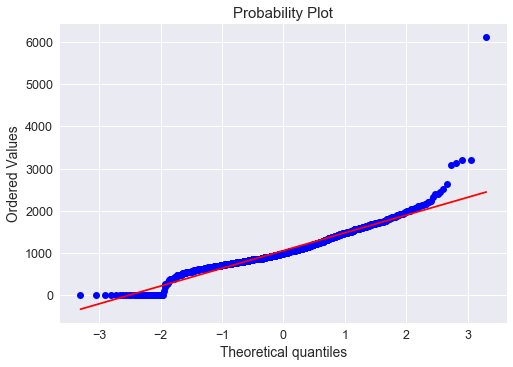

In [67]:
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

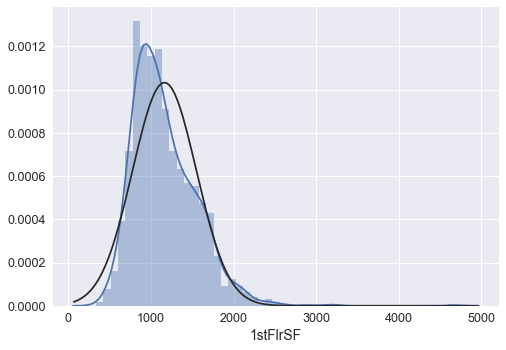

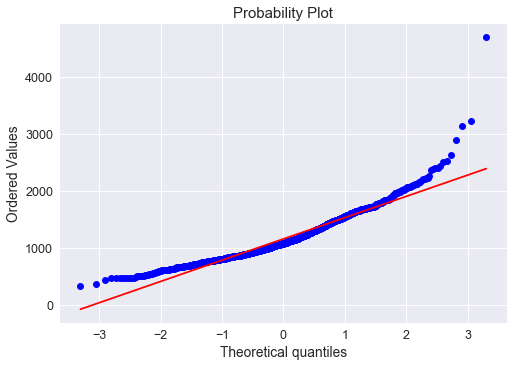

In [68]:
sns.distplot(train['1stFlrSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['1stFlrSF'], plot=plt)

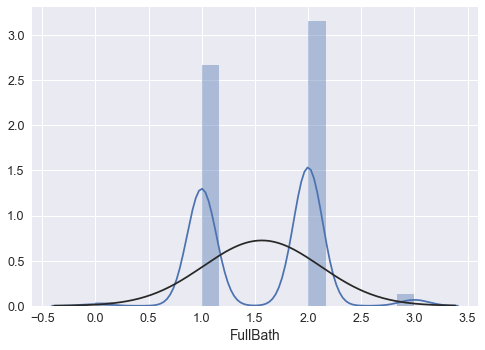

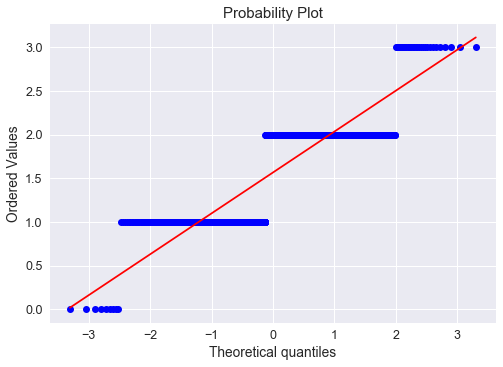

In [69]:
sns.distplot(train['FullBath'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['FullBath'], plot=plt)

In [75]:
#sns.distplot(train['BsmtQual'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(train['BsmtQual'], plot=plt)

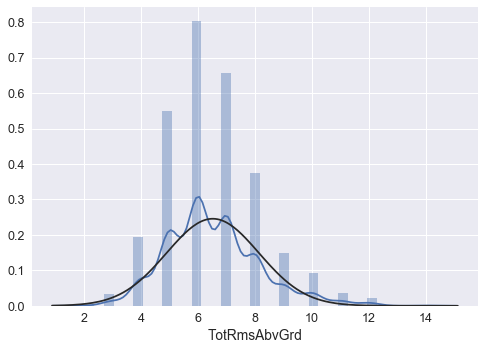

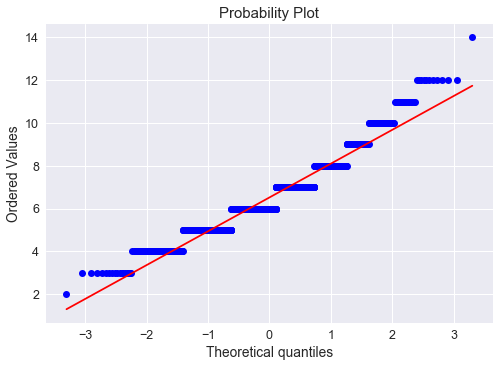

In [73]:
sns.distplot(train['TotRmsAbvGrd'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotRmsAbvGrd'], plot=plt)

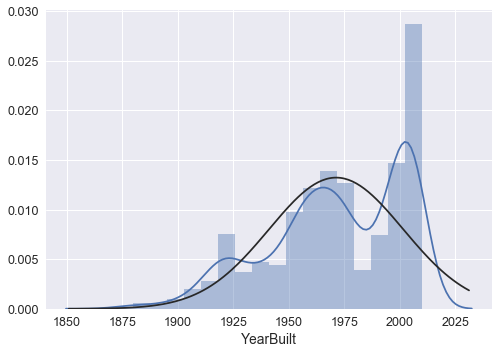

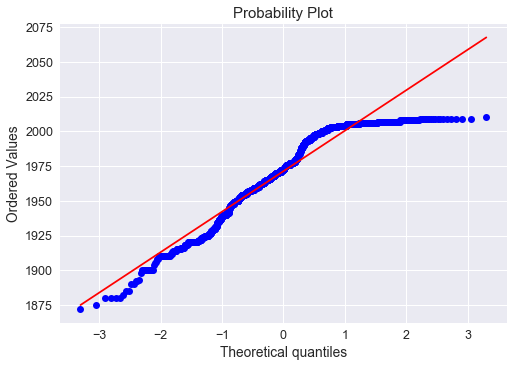

In [74]:
sns.distplot(train['YearBuilt'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['YearBuilt'], plot=plt)

In [1]:
.groupby('GarageYrBlt').describe("SalePrice")

NameError: name 'data' is not defined

In [ ]:
# Load libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

NameError: name 'train' is not defined